In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt

In [2]:
def sigmoidf (X):
    return  1 / (1 + np.exp(-X))

In [3]:
#load the data
def load():
    df = pd.read_csv (r'spambase.data',header=None)
    return df

In [4]:
def scale(df):
#scale the data to [0-1] range
    col=df.columns
    v = df.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    v_scaled = min_max_scaler.fit_transform(v)
    df = pd.DataFrame(v_scaled, columns=col)
    return df

In [51]:
def splits(df):
#randomly split the train and test datasets
    #kf =  RepeatedKFold(n_splits=5, n_repeats=1)
    kf =  RepeatedKFold(n_splits=5, n_repeats=1, random_state=12883823)
    df_train_l=[]
    df_test_l=[]
    for train, test in kf.split(df):
        df_train_l.append(train.reshape(-1,1))
        df_test_l.append(test.reshape(-1,1))
    return df_train_l,df_test_l


In [52]:
def getXandY(ind,df):
    #separate the data and the labels
    df=df.to_numpy()
    df=df[ind]
    Y=df[:,0,57]
    X=df[:,0,0:57]
    return X,Y

In [53]:
def Kernal(X_train,mode=0):
    if mode==0:
        return X_train.T
    elif mode==1:
        return (1/2)*np.power(X_train.T,2)
    elif mode==2:
        return np.exp(-0.5*np.power(X_train.T,2))
    else:
        return np.sin(1+np.power(X_train.T,2))
    

In [54]:
def calculateW(X_train,Y_train,alfa=2,iterations=100,mode=0):
    #getting a basis function
    fi_train=Kernal(X_train,mode)
    y_train=Y_train
    #getting the number of features m , number of data n
    m=fi_train.shape[0]
    n=fi_train.shape[1]
    #initialize W randomly 
    W=np.random.randn(m,1)*2.2
    Ypred=np.zeros((n,1))
    R=np.zeros((n,n))
    temp1=np.zeros((n,1))
    loss=[]
    #loop for finding W
    for i in range(iterations):
        Ypred=sigmoidf(np.dot(W.T,fi_train))
        temp1=Ypred-y_train
        R=np.dot(Ypred.T,(1-Ypred))
        temp2=np.linalg.pinv(np.dot(np.dot(fi_train,R),fi_train.T))
        L=(np.dot(np.dot(temp2,fi_train),temp1.T))
        loss.append(L)
        #alfa is the learning rate
        W=W-alfa*L

    Ypred=np.where(Ypred > 0.5, 1, 0)
    return W,Ypred.T

In [55]:
def model(X_test,W,mode):
    Y_pred=sigmoidf(np.dot(Kernal(X_test,mode).T,W))
    Y_pred=np.where(Y_pred > 0.5, 1, 0)
    Y_pred=Y_pred.astype(int)
    return Y_pred

In [56]:
#calculating the accuracy and the confudion matrix
def evaluation(Y_test,Y_pred):
    Y_test=Y_test.reshape(-1,1)
    accuracy=accuracy_score(Y_test, Y_pred)
    return accuracy

In [57]:
def plot_accuracy(train_acc_l,test_acc_l):
    x= [i for i in range(1,6)]
    plt.plot(x, train_acc_l , 'b^',linestyle='-',label='train acc')
    plt.plot(test_acc_l , 'g+',linestyle='-',label='test_acc')
    plt.xlabel('k folds')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

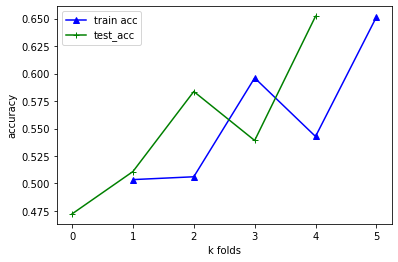

train_acc [0.5035326086956522, 0.5061124694376528, 0.5960336864982342, 0.5427872860635696, 0.6514534093996197]
test_acc [0.4723127035830619, 0.5108695652173914, 0.5836956521739131, 0.5391304347826087, 0.6521739130434783]
avg_acc_train 0.5599838920189456
avg_acc_test 0.5516364537600907


In [58]:
#main
mode=0
#the higher thenumber of iterations the better the results relatively
iterations=100
#the learning rate
alfa=2
df=load()
df=scale(df)
df_train_l,df_test_l=splits(df)
train_acc_l=[]
test_acc_l=[]
for i in range (len(df_train_l)):
    df_train=df_train_l[i]
    df_test=df_test_l[i]
    X_train,Y_train=getXandY(df_train,df)
    X_test,Y_test=getXandY(df_test,df)
    W,Y_train_pred=calculateW(X_train,Y_train,alfa,iterations,mode)
    Y_test_pred=model(X_test,W,mode)
    train_acc=evaluation(Y_train,Y_train_pred)
    test_acc=evaluation(Y_test,Y_test_pred)
    train_acc_l.append(train_acc)
    test_acc_l.append(test_acc)
avg_acc_train=sum(train_acc_l)/5
avg_acc_test=sum(test_acc_l)/5

plot_accuracy(train_acc_l,test_acc_l)
print("train_acc",train_acc_l)
print("test_acc",test_acc_l)
print("avg_acc_train",avg_acc_train)
print("avg_acc_test",avg_acc_test)